In [1]:
import sklearn as sk
import sklearn.tree as tree
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
import pickle
import matplotlib.pyplot as plt 


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder



In [3]:
df = pd.read_csv('data.csv')
df

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...",low,Neutral
1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"['dance_pop', 'pop', 'post-teen_pop']",low,Neutral
2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"['dance_pop', 'pop', 'r&b']",high,Negative
3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79,"['dance_pop', 'pop']",low,Neutral
4,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"['pop_rap', 'reggae_fusion']",low,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34242,Jon D,3uCHI1gfOUL5j5swEh0TcH,I Don't Know,0.669,0.228,2,-12.119,1,0.0690,0.79200,0.065000,0.0944,0.402,83.024,47,unknown,27,['unknown'],low,Neutral
34243,Big Words,0P1oO2gREMYUCoOkzYAyFu,The Answer,0.493,0.727,1,-5.031,1,0.2170,0.08730,0.000000,0.1290,0.289,73.259,39,australian_r&b,37,['australian_r&b'],low,Neutral
34244,Allan Rayman,2oM4BuruDnEvk59IvIXCwn,25.22,0.702,0.524,7,-10.710,1,0.0793,0.33200,0.055300,0.2980,0.265,140.089,55,canadian_contemporary_r&b modern_alternative_rock,49,"['canadian_contemporary_r&b', 'modern_alternat...",low,Neutral
34245,Jon Jason,4Ri5TTUgjM96tbQZd5Ua7V,Good Feeling,0.509,0.286,8,-14.722,1,0.1230,0.40200,0.000012,0.1310,0.259,121.633,4,unknown,16,['unknown'],high,Positive


In [4]:
df['genres_list']


0        ['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...
1                    ['dance_pop', 'pop', 'post-teen_pop']
2                              ['dance_pop', 'pop', 'r&b']
3                                     ['dance_pop', 'pop']
4                             ['pop_rap', 'reggae_fusion']
                               ...                        
34242                                          ['unknown']
34243                                   ['australian_r&b']
34244    ['canadian_contemporary_r&b', 'modern_alternat...
34245                                          ['unknown']
34246    ['indie_poptimism', 'indiecoustica', 'modern_a...
Name: genres_list, Length: 34247, dtype: object

In [5]:

df['artists_song'] = df.apply(lambda row: row['artist_name']+row['track_name'],axis = 1)

print("Are all songs unique: ",len(pd.unique(df.artists_song))==len(df))
df

Are all songs unique:  True


,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity,artists_song
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,...,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...",low,Neutral,Missy ElliottLose Control (feat. Ciara & Fat M...
1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,...,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"['dance_pop', 'pop', 'post-teen_pop']",low,Neutral,Britney SpearsToxic
2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,...,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"['dance_pop', 'pop', 'r&b']",high,Negative,BeyoncéCrazy In Love
3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,...,0.0521,0.817,100.972,82,dance_pop pop,79,"['dance_pop', 'pop']",low,Neutral,Justin TimberlakeRock Your Body
4,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,...,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"['pop_rap', 'reggae_fusion']",low,Neutral,ShaggyIt Wasn't Me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34242,Jon D,3uCHI1gfOUL5j5swEh0TcH,I Don't Know,0.669,0.228,2,-12.119,1,0.0690,0.79200,...,0.0944,0.402,83.024,47,unknown,27,['unknown'],low,Neutral,Jon DI Don't Know
34243,Big Words,0P1oO2gREMYUCoOkzYAyFu,The Answer,0.493,0.727,1,-5.031,1,0.2170,0.08730,...,0.1290,0.289,73.259,39,australian_r&b,37,['australian_r&b'],low,Neutral,Big WordsThe Answer
34244,Allan Rayman,2oM4BuruDnEvk59IvIXCwn,25.22,0.702,0.524,7,-10.710,1,0.0793,0.33200,...,0.2980,0.265,140.089,55,canadian_contemporary_r&b modern_alternative_rock,49,"['canadian_contemporary_r&b', 'modern_alternat...",low,Neutral,Allan Rayman25.22
34245,Jon Jason,4Ri5TTUgjM96tbQZd5Ua7V,Good Feeling,0.509,0.286,8,-14.722,1,0.1230,0.40200,...,0.1310,0.259,121.633,4,unknown,16,['unknown'],high,Positive,Jon JasonGood Feeling


In [6]:
def select_cols(df):
       '''
       Select useful columns
       '''
       return df[['artist_name','id','track_name','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "artist_pop", "genres", "track_pop"]]
songDF = select_cols(df)
songDF.head()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83
2,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25
3,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79
4,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2


In [7]:
cat_df=df.select_dtypes(include='object')
cat_df.drop(['genres_list', 'genres'],axis=1,inplace=True)
cat_df.columns

Index(['artist_name', 'id', 'track_name', 'subjectivity', 'polarity',
       'artists_song'],
      dtype='object')

In [8]:
cat_df2=df.select_dtypes(include='object')
cat_df2.columns
    

Index(['artist_name', 'id', 'track_name', 'genres', 'genres_list',
       'subjectivity', 'polarity', 'artists_song'],
      dtype='object')

In [9]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])


In [10]:
for col in cat_df.columns:
    transform(col)

df

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity,artists_song
0,5800,2197,15295,0.904,0.813,4,-7.105,0,0.1210,0.03110,...,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...",1,1,20445
1,1180,27560,26490,0.774,0.838,5,-3.914,0,0.1140,0.02490,...,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"['dance_pop', 'pop', 'post-teen_pop']",1,1,4203
2,871,2371,5367,0.664,0.758,2,-6.583,0,0.2100,0.00238,...,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"['dance_pop', 'pop', 'r&b']",0,0,3063
3,4415,5146,20810,0.892,0.714,4,-6.055,0,0.1410,0.20100,...,0.0521,0.817,100.972,82,dance_pop pop,79,"['dance_pop', 'pop']",1,1,15490
4,7391,7734,13070,0.853,0.606,0,-4.596,1,0.0713,0.05610,...,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"['pop_rap', 'reggae_fusion']",1,1,26185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34242,4237,17043,11542,0.669,0.228,2,-12.119,1,0.0690,0.79200,...,0.0944,0.402,83.024,47,unknown,27,['unknown'],1,1,14883
34243,904,1824,24679,0.493,0.727,1,-5.031,1,0.2170,0.08730,...,0.1290,0.289,73.259,39,australian_r&b,37,['australian_r&b'],1,1,3240
34244,346,12232,274,0.702,0.524,7,-10.710,1,0.0793,0.33200,...,0.2980,0.265,140.089,55,canadian_contemporary_r&b modern_alternative_rock,49,"['canadian_contemporary_r&b', 'modern_alternat...",1,1,1361
34245,4240,19397,9577,0.509,0.286,8,-14.722,1,0.1230,0.40200,...,0.1310,0.259,121.633,4,unknown,16,['unknown'],0,2,14888


In [11]:
df

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity,artists_song
0,5800,2197,15295,0.904,0.813,4,-7.105,0,0.1210,0.03110,...,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...",1,1,20445
1,1180,27560,26490,0.774,0.838,5,-3.914,0,0.1140,0.02490,...,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"['dance_pop', 'pop', 'post-teen_pop']",1,1,4203
2,871,2371,5367,0.664,0.758,2,-6.583,0,0.2100,0.00238,...,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"['dance_pop', 'pop', 'r&b']",0,0,3063
3,4415,5146,20810,0.892,0.714,4,-6.055,0,0.1410,0.20100,...,0.0521,0.817,100.972,82,dance_pop pop,79,"['dance_pop', 'pop']",1,1,15490
4,7391,7734,13070,0.853,0.606,0,-4.596,1,0.0713,0.05610,...,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"['pop_rap', 'reggae_fusion']",1,1,26185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34242,4237,17043,11542,0.669,0.228,2,-12.119,1,0.0690,0.79200,...,0.0944,0.402,83.024,47,unknown,27,['unknown'],1,1,14883
34243,904,1824,24679,0.493,0.727,1,-5.031,1,0.2170,0.08730,...,0.1290,0.289,73.259,39,australian_r&b,37,['australian_r&b'],1,1,3240
34244,346,12232,274,0.702,0.524,7,-10.710,1,0.0793,0.33200,...,0.2980,0.265,140.089,55,canadian_contemporary_r&b modern_alternative_rock,49,"['canadian_contemporary_r&b', 'modern_alternat...",1,1,1361
34245,4240,19397,9577,0.509,0.286,8,-14.722,1,0.1230,0.40200,...,0.1310,0.259,121.633,4,unknown,16,['unknown'],0,2,14888


In [51]:
df = df.genres_list[:, ~df.columns.str.contains('^unknown')]
df

KeyError: 'key of type tuple not found and not a MultiIndex'

In [12]:
pop = songDF[["artist_pop"]].reset_index(drop = True)
scaler = MinMaxScaler()
df[["artist_pop"]] = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
df.head()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity,artists_song
0,5800,2197,15295,0.904,0.813,4,-7.105,0,0.1210,0.03110,...,0.0471,0.810,125.461,0.74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"['dance_pop', 'hip_hop', 'hip_pop', 'pop', 'po...",1,1,20445
1,1180,27560,26490,0.774,0.838,5,-3.914,0,0.1140,0.02490,...,0.2420,0.924,143.040,0.84,dance_pop pop post-teen_pop,83,"['dance_pop', 'pop', 'post-teen_pop']",1,1,4203
2,871,2371,5367,0.664,0.758,2,-6.583,0,0.2100,0.00238,...,0.0598,0.701,99.259,0.86,dance_pop pop r&b,25,"['dance_pop', 'pop', 'r&b']",0,0,3063
3,4415,5146,20810,0.892,0.714,4,-6.055,0,0.1410,0.20100,...,0.0521,0.817,100.972,0.82,dance_pop pop,79,"['dance_pop', 'pop']",1,1,15490
4,7391,7734,13070,0.853,0.606,0,-4.596,1,0.0713,0.05610,...,0.3130,0.654,94.759,0.75,pop_rap reggae_fusion,2,"['pop_rap', 'reggae_fusion']",1,1,26185


In [13]:
df.isnull().any()

artist_name         False
id                  False
track_name          False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
artist_pop          False
genres              False
track_pop           False
genres_list         False
subjectivity        False
polarity            False
artists_song        False
dtype: bool

In [14]:
df.dtypes


artist_name           int32
id                    int32
track_name            int32
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
artist_pop          float64
genres               object
track_pop             int64
genres_list          object
subjectivity          int32
polarity              int32
artists_song          int32
dtype: object

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [17]:
df['artist_name'] = pd.to_numeric(df['artist_name'])


<AxesSubplot:>

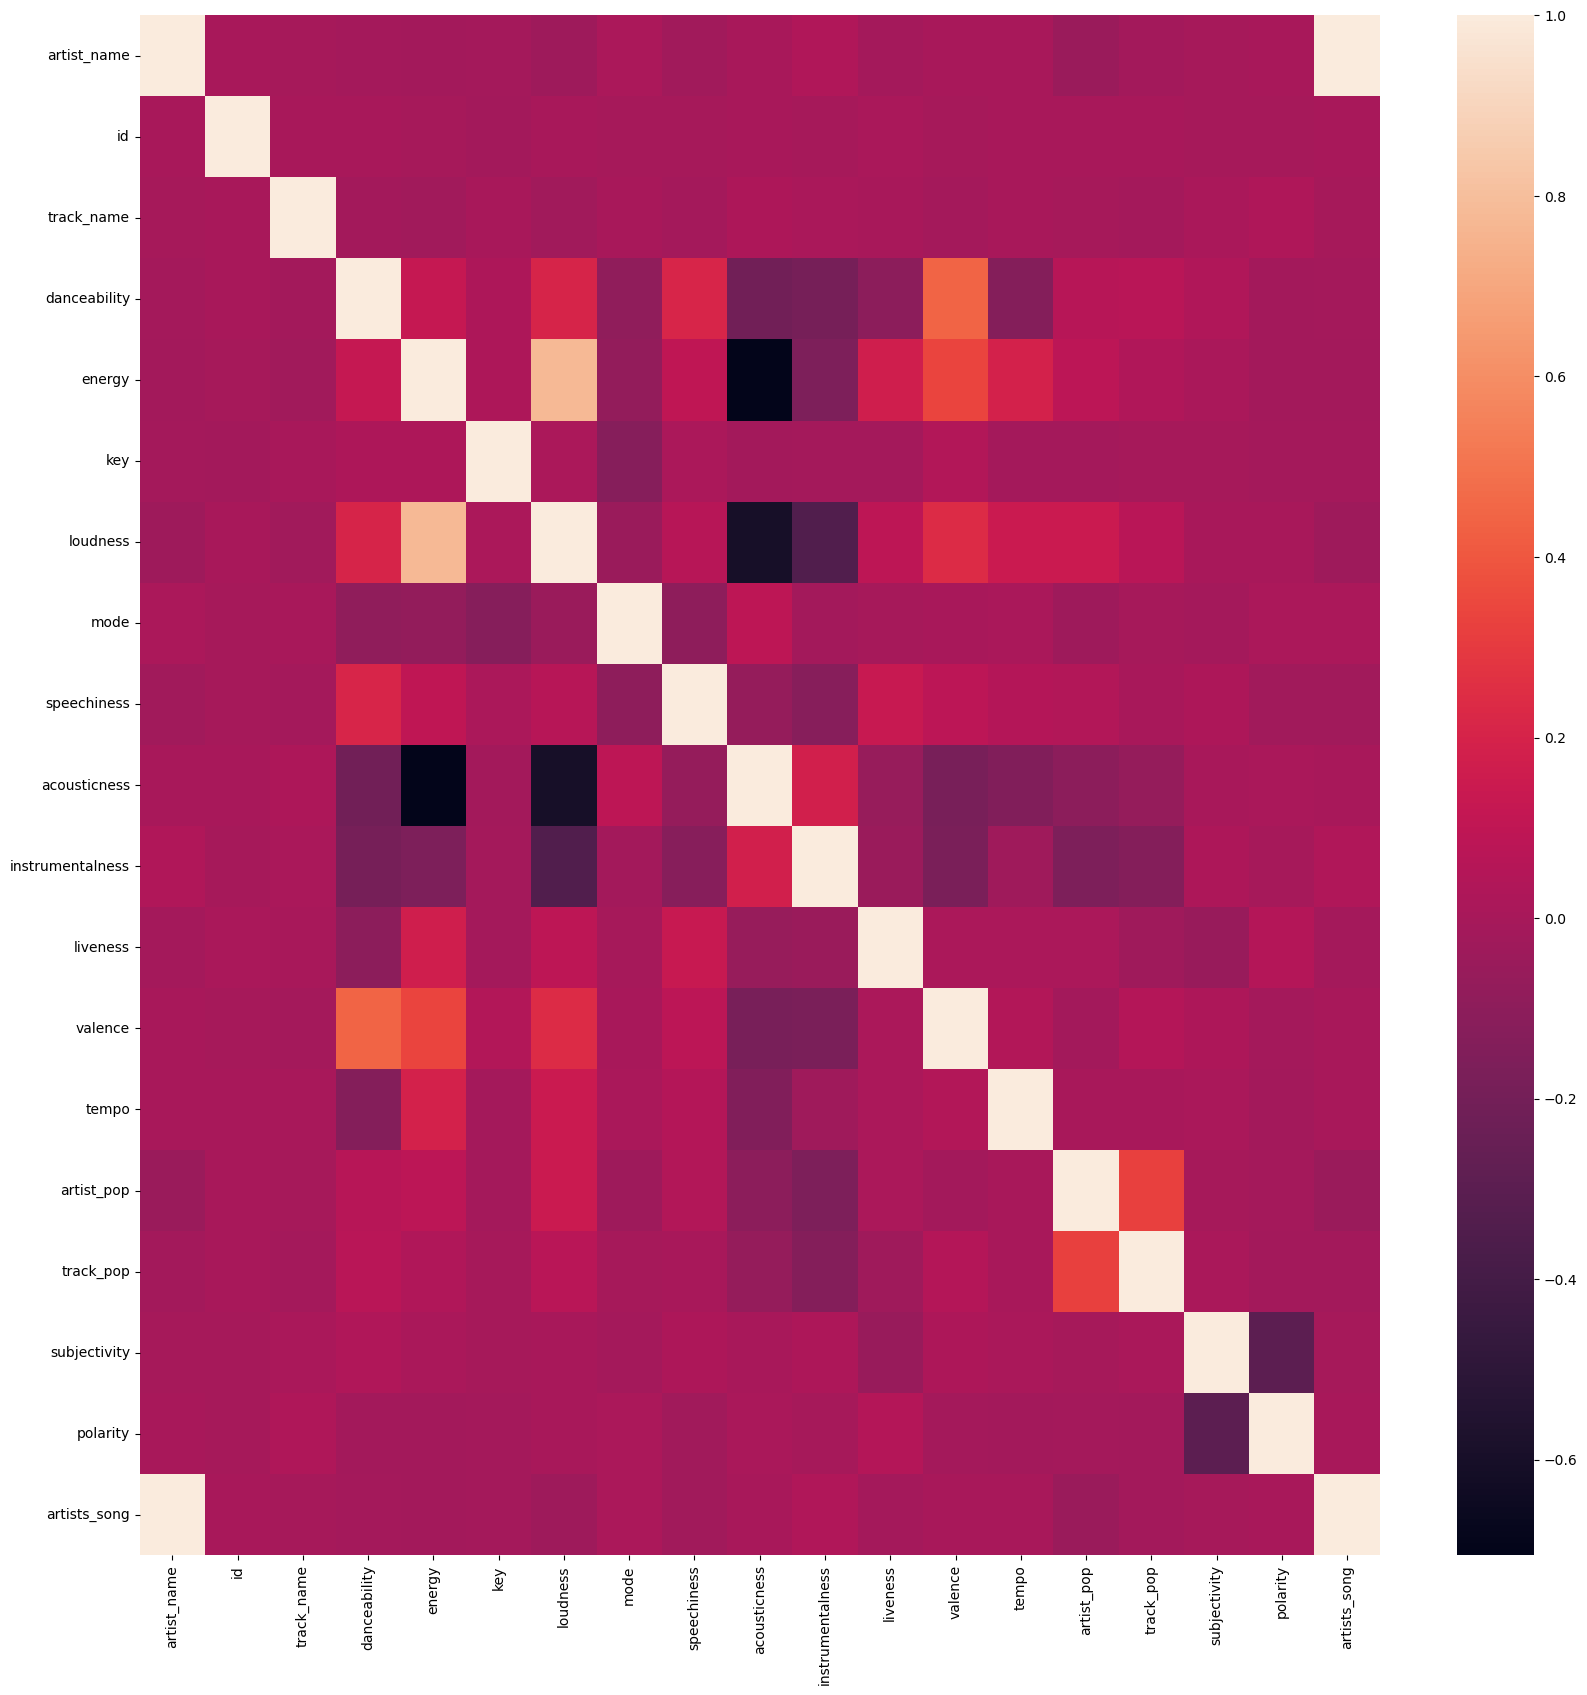

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=False)

In [52]:
rs = np.random.RandomState(0)
df2 = pd.DataFrame(rs.rand(20,20))
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.113361,0.285594,0.360521,-0.020412,0.341770,-0.491274,0.100977,0.014240,-0.093023,-0.426735,0.225761,-0.291058,-0.208998,-0.081966,0.134277,0.186473,0.240621,0.273039,-0.132514
1,0.113361,1.000000,0.127096,-0.025313,-0.178498,0.010450,0.040508,0.108862,0.587234,-0.011340,-0.041990,-0.502543,0.049605,-0.342291,-0.437863,-0.201248,-0.235897,0.370524,0.065584,0.357861
2,0.285594,0.127096,1.000000,-0.065748,0.195185,0.221265,-0.037794,-0.139160,0.241889,-0.258206,-0.059230,-0.265130,0.274278,-0.193409,0.096411,-0.180454,-0.136031,0.163928,-0.188521,-0.130729
3,0.360521,-0.025313,-0.065748,1.000000,0.047884,0.678033,-0.376407,0.395160,0.016667,0.234069,-0.248021,0.422752,-0.364239,0.092483,-0.261223,0.317627,0.529237,0.338542,0.057769,-0.180890
4,-0.020412,-0.178498,0.195185,0.047884,1.000000,0.264381,-0.227755,-0.113220,0.042998,-0.036768,-0.173542,-0.126469,-0.243482,0.290681,0.115137,0.013744,0.167279,0.111600,-0.347616,-0.334955
5,0.341770,0.010450,0.221265,0.678033,0.264381,1.000000,-0.316518,0.195355,0.107717,-0.235590,-0.349445,0.227766,-0.195263,0.086811,-0.218501,0.213671,0.261171,0.277891,-0.347551,-0.340933
6,-0.491274,0.040508,-0.037794,-0.376407,-0.227755,-0.316518,1.000000,-0.188035,0.033365,0.256341,-0.072914,-0.119711,0.442944,0.198629,0.033754,-0.099974,-0.374419,-0.217362,-0.231439,0.169208
7,0.100977,0.108862,-0.139160,0.395160,-0.113220,0.195355,-0.188035,1.000000,-0.037780,0.214364,-0.154834,0.384842,-0.162097,0.350181,-0.275619,0.361733,0.052353,0.399224,0.164105,0.275134
8,0.014240,0.587234,0.241889,0.016667,0.042998,0.107717,0.033365,-0.037780,1.000000,-0.138790,0.065388,-0.556369,-0.086674,-0.116821,-0.236966,-0.275252,-0.425123,0.050200,-0.375411,-0.073956
9,-0.093023,-0.011340,-0.258206,0.234069,-0.036768,-0.235590,0.256341,0.214364,-0.138790,1.000000,-0.210620,0.172717,0.097095,0.024991,-0.321074,0.268368,0.303701,-0.139127,0.038266,0.193341


In [53]:

 	0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19
0	1.000000	0.113361	0.285594	0.360521	-0.020412	0.341770	-0.491274	0.100977	0.014240	-0.093023	-0.426735	0.225761	-0.291058	-0.208998	-0.081966	0.134277	0.186473	0.240621	0.273039	-0.132514
1	0.113361	1.000000	0.127096	-0.025313	-0.178498	0.010450	0.040508	0.108862	0.587234	-0.011340	-0.041990	-0.502543	0.049605	-0.342291	-0.437863	-0.201248	-0.235897	0.370524	0.065584	0.357861
2	0.285594	0.127096	1.000000	-0.065748	0.195185	0.221265	-0.037794	-0.139160	0.241889	-0.258206	-0.059230	-0.265130	0.274278	-0.193409	0.096411	-0.180454	-0.136031	0.163928	-0.188521	-0.130729
3	0.360521	-0.025313	-0.065748	1.000000	0.047884	0.678033	-0.376407	0.395160	0.016667	0.234069	-0.248021	0.422752	-0.364239	0.092483	-0.261223	0.317627	0.529237	0.338542	0.057769	-0.180890
4	-0.020412	-0.178498	0.195185	0.047884	1.000000	0.264381	-0.227755	-0.113220	0.042998	-0.036768	-0.173542	-0.126469	-0.243482	0.290681	0.115137	0.013744	0.167279	0.111600	-0.347616	-0.334955
5	0.341770	0.010450	0.221265	0.678033	0.264381	1.000000	-0.316518	0.195355	0.107717	-0.235590	-0.349445	0.227766	-0.195263	0.086811	-0.218501	0.213671	0.261171	0.277891	-0.347551	-0.340933
6	-0.491274	0.040508	-0.037794	-0.376407	-0.227755	-0.316518	1.000000	-0.188035	0.033365	0.256341	-0.072914	-0.119711	0.442944	0.198629	0.033754	-0.099974	-0.374419	-0.217362	-0.231439	0.169208
7	0.100977	0.108862	-0.139160	0.395160	-0.113220	0.195355	-0.188035	1.000000	-0.037780	0.214364	-0.154834	0.384842	-0.162097	0.350181	-0.275619	0.361733	0.052353	0.399224	0.164105	0.275134
8	0.014240	0.587234	0.241889	0.016667	0.042998	0.107717	0.033365	-0.037780	1.000000	-0.138790	0.065388	-0.556369	-0.086674	-0.116821	-0.236966	-0.275252	-0.425123	0.050200	-0.375411	-0.073956
9	-0.093023	-0.011340	-0.258206	0.234069	-0.036768	-0.235590	0.256341	0.214364	-0.138790	1.000000	-0.210620	0.172717	0.097095	0.024991	-0.321074	0.268368	0.303701	-0.139127	0.038266	0.193341
10	-0.426735	-0.041990	-0.059230	-0.248021	-0.173542	-0.349445	-0.072914	-0.154834	0.065388	-0.210620	1.000000	-0.239834	0.334884	-0.052909	0.009813	-0.221300	-0.010186	0.111344	0.098513	0.416315
11	0.225761	-0.502543	-0.265130	0.422752	-0.126469	0.227766	-0.119711	0.384842	-0.556369	0.172717	-0.239834	1.000000	-0.017687	0.498873	-0.042063	0.184528	0.568080	0.018864	0.292483	-0.239025
12	-0.291058	0.049605	0.274278	-0.364239	-0.243482	-0.195263	0.442944	-0.162097	-0.086674	0.097095	0.334884	-0.017687	1.000000	-0.171221	-0.055525	-0.497766	0.001269	0.044254	0.090822	0.221185
13	-0.208998	-0.342291	-0.193409	0.092483	0.290681	0.086811	0.198629	0.350181	-0.116821	0.024991	-0.052909	0.498873	-0.171221	1.000000	-0.138726	0.249787	0.034208	-0.118775	-0.229511	-0.064059
14	-0.081966	-0.437863	0.096411	-0.261223	0.115137	-0.218501	0.033754	-0.275619	-0.236966	-0.321074	0.009813	-0.042063	-0.055525	-0.138726	1.000000	-0.346645	-0.123026	-0.051595	0.182108	-0.184358
15	0.134277	-0.201248	-0.180454	0.317627	0.013744	0.213671	-0.099974	0.361733	-0.275252	0.268368	-0.221300	0.184528	-0.497766	0.249787	-0.346645	1.000000	0.208005	-0.092224	-0.353102	0.119684
16	0.186473	-0.235897	-0.136031	0.529237	0.167279	0.261171	-0.374419	0.052353	-0.425123	0.303701	-0.010186	0.568080	0.001269	0.034208	-0.123026	0.208005	1.000000	0.154940	0.134161	-0.142778
17	0.240621	0.370524	0.163928	0.338542	0.111600	0.277891	-0.217362	0.399224	0.050200	-0.139127	0.111344	0.018864	0.044254	-0.118775	-0.051595	-0.092224	0.154940	1.000000	0.418457	0.327666
18	0.273039	0.065584	-0.188521	0.057769	-0.347616	-0.347551	-0.231439	0.164105	-0.375411	0.038266	0.098513	0.292483	0.090822	-0.229511	0.182108	-0.353102	0.134161	0.418457	1.000000	0.279636
19	-0.132514	0.357861	-0.130729	-0.180890	-0.334955	-0.340933	0.169208	0.275134	-0.073956	0.193341	0.416315	-0.239025	0.221185	-0.064059	-0.184358	0.119684	-0.142778	0.327666	0.279636	1.000000
#sns.countplot(x='genres', data=df)

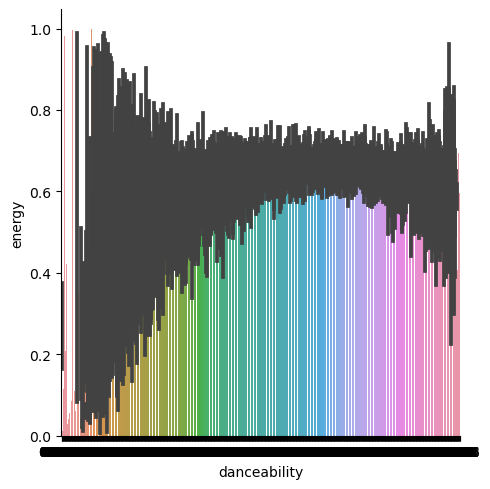

In [21]:
sns.catplot(data=df,x = 'danceability', y='energy', kind="bar")

In [22]:
#sns.catplot(data=df,x = 'tempo', y='mode', kind="bar")

In [23]:
#sns.catplot(data=df,x = 'genres_list', y='tempo', kind="bar")

In [24]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

C:\Users\hemre\AppData\Local\Temp\ipykernel_14176\1950163597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tempo'])


<AxesSubplot:xlabel='tempo', ylabel='Density'>

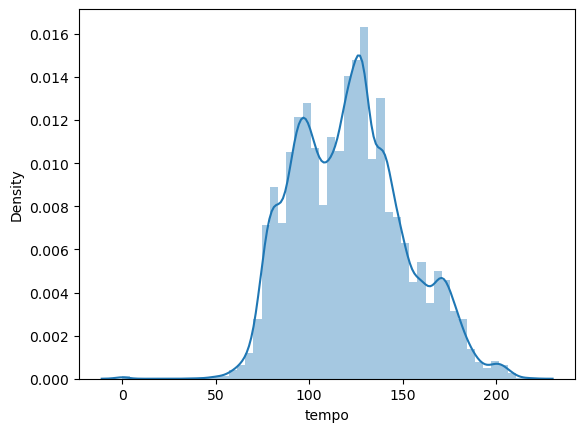

In [31]:
sns.distplot(df['tempo'])

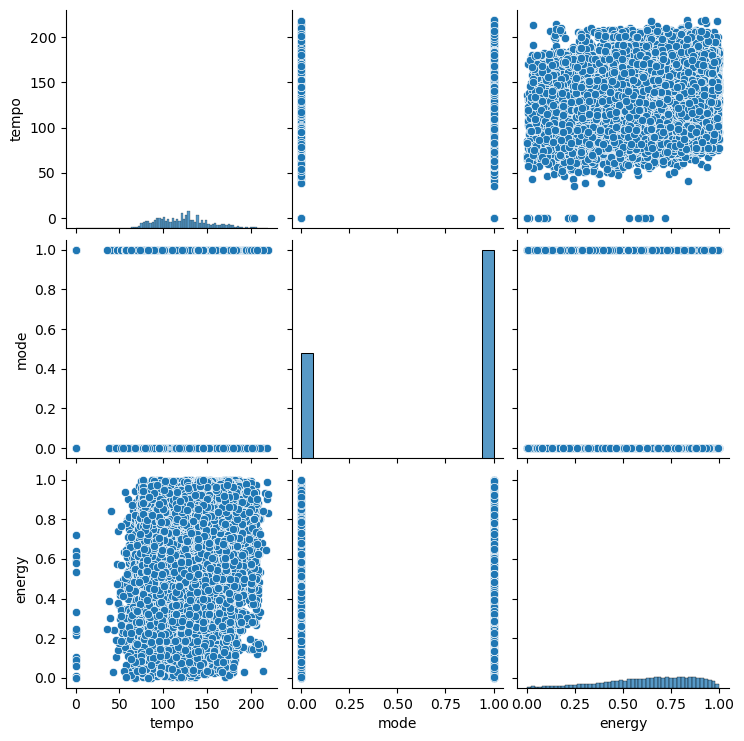

In [37]:
sns.pairplot(df[['tempo' ,'mode', 'energy']])

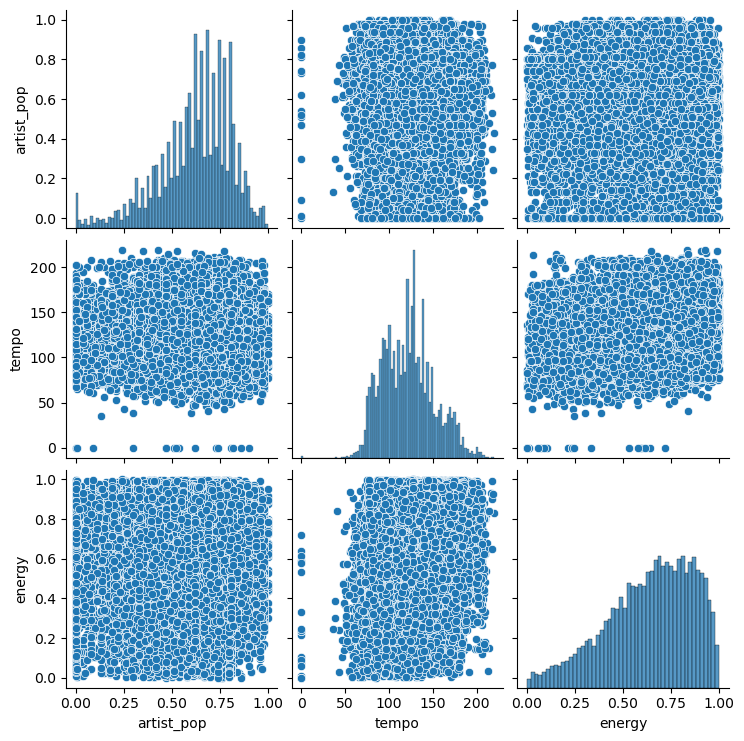

In [39]:
sns.pairplot(df[['artist_pop' ,'tempo', 'energy']])

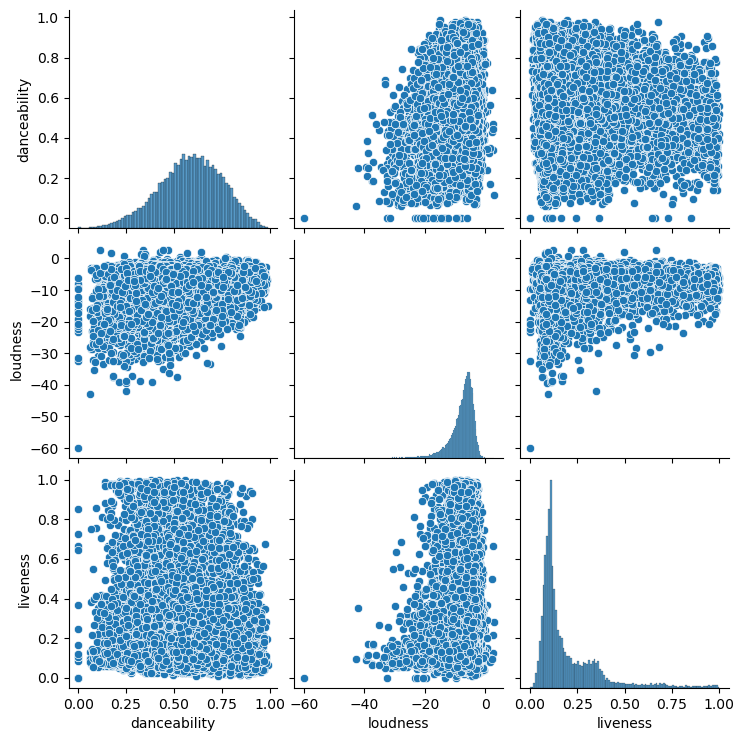

In [40]:
sns.pairplot(df[['danceability' ,'loudness', 'liveness']])

<AxesSubplot:>

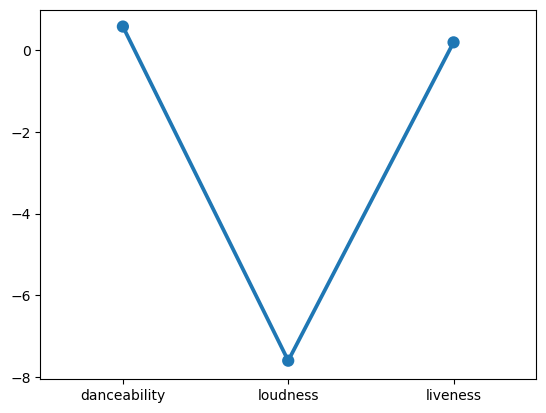

In [43]:
sns.pointplot(df[['danceability' ,'loudness', 'liveness']])

In [48]:
iris = sns.load_dataset("loudness")



ValueError: 'loudness' is not one of the example datasets.